In [5]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import cartopy.crs as ccrs
from matplotlib.colors import Normalize
# import rioxarray  # For projection conversion

In [7]:
ds = xr.open_dataset('swe/combined_swe_eu.nc')
swe = xr.DataArray(ds['SWE'])
lats = xr.DataArray(ds['lat'])
lons = xr.DataArray(ds['lon'])
time = xr.DataArray(ds['time'])
print(swe.shape)

(2014, 38, 56)


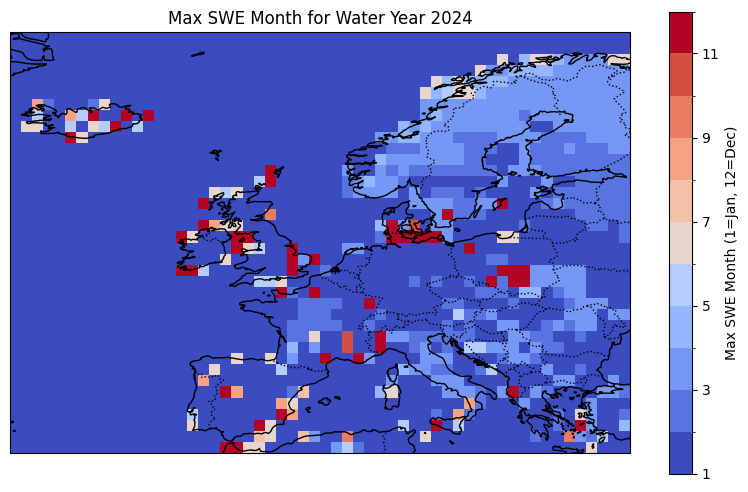

In [24]:
import matplotlib.colors as mcolors
import cartopy.feature as cfeature

ds = xr.open_dataset("swe/max_swe_month_per_water_year.nc")

# Select a specific water year to plot (change as needed)
water_year_to_plot = 2024
data = ds.sel(water_year=water_year_to_plot)

# Extract lat, lon, and max SWE month values
lats = data.lat.values
lons = data.lon.values
max_swe_month = data.SWE.values  # This should be 2D (lat, lon)

# Set up the map
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})

cmap = plt.get_cmap("coolwarm", 12)  # 12 discrete colors
norm = mcolors.BoundaryNorm(boundaries=np.arange(1, 13, 1), ncolors=13)  # Bins for 1–12


# Plot data using pcolormesh (for filled grid cells)
c = ax.pcolormesh(lons, lats, max_swe_month, cmap=cmap, norm=norm, shading="auto")


# Add coastlines and grid lines
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
# ax.gridlines(draw_labels=True)

# Add colorbar
cbar = plt.colorbar(c, ax=ax, orientation="vertical", label="Max SWE Month (1=Jan, 12=Dec)")

# Title
plt.title(f"Max SWE Month for Water Year {water_year_to_plot}")

# Show the plot
plt.show()